In [1]:
import json

In [2]:
with open("../results/EAUC.json", "r") as f:
    EAUC = json.load(f)
    print(EAUC)

{'global_gaussian': {'rocket': {'SwedishLeaf': {'shapley': [0.9664, 0.0832, 0.0736, 0.0736, 0.0736, 0.0736, 0.0736, 0.0736, 0.0736, 0.0736, 0.0736], 'kernelshap': [0.9664, 0.0864, 0.08, 0.0752, 0.0736, 0.072, 0.072, 0.0736, 0.0736, 0.0752, 0.0736], 'leftist_shap': [0.9664, 0.0912, 0.0784, 0.0768, 0.0736, 0.0736, 0.0736, 0.0736, 0.072, 0.0736, 0.0736], 'leftist_lime': [0.9664, 0.104, 0.0784, 0.0736, 0.0736, 0.0736, 0.0736, 0.072, 0.0736, 0.0736, 0.0736], 'lime': [0.9664, 0.1456, 0.104, 0.0816, 0.0816, 0.0736, 0.072, 0.0704, 0.0752, 0.0736, 0.0736], 'mrseql': [0.9664, 0.1168, 0.0832, 0.0752, 0.0736, 0.0736, 0.0736, 0.0736, 0.0736, 0.0736, 0.0736]}, 'ECG200': {'shapley': [0.92, 0.77, 0.71, 0.67, 0.65, 0.65, 0.65, 0.65, 0.66, 0.64, 0.64], 'kernelshap': [0.92, 0.86, 0.79, 0.74, 0.7, 0.69, 0.69, 0.64, 0.7, 0.66, 0.64], 'leftist_shap': [0.92, 0.64, 0.63, 0.61, 0.63, 0.62, 0.63, 0.63, 0.64, 0.63, 0.64], 'leftist_lime': [0.92, 0.64, 0.61, 0.63, 0.62, 0.63, 0.64, 0.63, 0.64, 0.64, 0.64], 'lime':

In [3]:
global_gaussian = EAUC["global_gaussian"]
local_gaussian = EAUC["local_gaussian"]
global_mean = EAUC["global_mean"]
local_mean = EAUC["local_mean"]

In [65]:
local_mean["resnet"]["ECG200"].keys()

dict_keys(['shapley', 'kernelshap', 'leftist_shap', 'leftist_lime', 'lime', 'mrseql'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# calculacte area under the curve

models = ["rocket", "resnet", "mrseql"]
datasets = ["SwedishLeaf", "ECG200", "Plane"]
explainers = ["shapley", "kernelshap", "leftist_shap", "leftist_lime", "lime", "mrseql"]
methods = [global_gaussian, global_mean, local_gaussian, local_mean]

EAUCs = {}

explainer = "shapley"

all_eaucs_scaled = []

for method in methods:

    for model in models:
        
        eauc_model = []
        for explainer in explainers:

            eauc = 0
            for dataset in datasets:

                accs = method[model][dataset][explainer]
                eauc += np.trapz(accs, x=np.arange(0.0, 1.01, 0.1))
                
            eauc = round(eauc / len(datasets), 2)
            eauc_model.append(eauc)
        
        eauc_model = np.array(eauc_model)
        eauc_model = np.interp(eauc_model, (eauc_model.min(), eauc_model.max()), (0, 1)).tolist()
        all_eaucs_scaled.append(eauc_model)
    
all_eaucs_scaled = np.array(all_eaucs_scaled)

print(all_eaucs_scaled.shape)
print(all_eaucs_scaled)

(12, 6)
[[0.4        0.8        0.         0.2        1.         0.8       ]
 [0.85714286 0.71428571 0.07142857 0.         0.64285714 1.        ]
 [0.6        0.6        0.13333333 0.         0.33333333 1.        ]
 [0.         0.30769231 0.23076923 0.15384615 0.76923077 1.        ]
 [0.5        0.5        0.2        0.         0.5        1.        ]
 [1.         1.         0.33333333 0.         0.73333333 0.93333333]
 [0.         0.42857143 0.         0.14285714 0.57142857 1.        ]
 [0.83333333 0.75       0.16666667 0.         0.5        1.        ]
 [0.6        0.6        0.06666667 0.         0.13333333 1.        ]
 [0.         0.23076923 0.15384615 0.         0.76923077 1.        ]
 [0.125      0.1875     0.125      0.         0.1875     1.        ]
 [1.         1.         0.26666667 0.         0.66666667 1.        ]]


In [94]:
means = np.mean(all_eaucs_scaled, axis=0)
means = np.interp(means, (means.min(), means.max()), (0, 1))
means = 1 - means
means = [str(round(x, 2)) for x in means]
"& " + " & ".join(means)

'& 0.52 & 0.41 & 0.89 & 1.0 & 0.44 & 0.0'

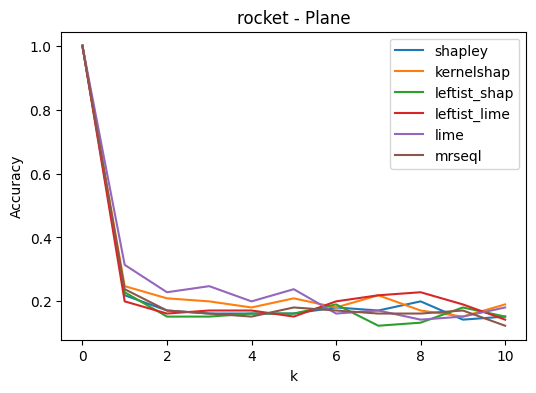

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

model = "rocket"
dataset = "Plane"

for key, values in global_gaussian[model][dataset].items():

    plt.plot(values, label=key)
plt.legend()

plt.title(f"{model} - {dataset}")

plt.xlabel("k")
plt.ylabel("Accuracy")

plt.show()